In [1]:
suppressPackageStartupMessages(library(ArchR))
suppressPackageStartupMessages(library(ArchRNA))
suppressPackageStartupMessages(library(parallel))   
suppressWarnings(addArchRGenome("mm10"))

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘Matrix’ was built under R version 4.1.3”
Warning message:
“package ‘magrittr’ was built under R version 4.1.3”
Setting default genome to Mm10.



In [2]:
download.file("https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE142853&format=file", destfile="GSE142853_RAW.tar")
utils::untar("GSE142853_RAW.tar")
dir.create("GSE142853")
dir.create("GSE142853/control")
dir.create("GSE142853/AD")

files <- c("GSM4244976_control_barcodes.tsv.gz"  =   "GSE142853/control/barcodes.tsv.gz",
           "GSM4244976_control_features.tsv.gz"  =   "GSE142853/control/features.tsv.gz",
           "GSM4244976_control_matrix.mtx.gz"    =   "GSE142853/control/matrix.mtx.gz",
           "GSM4244977_AD_barcodes.tsv.gz"       =   "GSE142853/AD/barcodes.tsv.gz",
           "GSM4244977_AD_features.tsv.gz"       =   "GSE142853/AD/features.tsv.gz",
           "GSM4244977_AD_matrix.mtx.gz"         =   "GSE142853/AD/matrix.mtx.gz")

file.rename(names(files), files)

Warning message in dir.create("GSE142853"):
“'GSE142853' already exists”
Warning message in dir.create("GSE142853/control"):
“'GSE142853/control' already exists”
Warning message in dir.create("GSE142853/AD"):
“'GSE142853/AD' already exists”


[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [3]:
proj <- RnaArchRProject(c("GSE142853/control", "GSE142853/AD"), c("CTRL", "AD"), "brain", file_type="10X")

In [4]:
proj <- suppressWarnings(addDoubletScores_(proj, verbose=F))

ArchR logging to : ArchRLogs/ArchR-addDoubletScores-9ca8e3f910632-Date-2023-02-26_Time-21-44-33.log
If there is an issue, please report to github with logFile!

2023-02-26 21:44:33 : Batch Execution w/ safelapply!, 0 mins elapsed.

Biased Clusters : 
Cluster4 


AD (1 of 2) : UMAP Projection R^2 = 0.97353

AD (1 of 2) : UMAP Projection R^2 = 0.97353

Biased Clusters : 
Cluster6 


CTRL (2 of 2) : UMAP Projection R^2 = 0.98951

CTRL (2 of 2) : UMAP Projection R^2 = 0.98951

ArchR logging successful to : ArchRLogs/ArchR-addDoubletScores-9ca8e3f910632-Date-2023-02-26_Time-21-44-33.log



In [5]:
proj@cellColData

DataFrame with 3404 rows and 7 columns
                        Sample    Gex_RiboRatio Gex_nUMI Gex_nGenes
                         <Rle>          <array>  <array>    <array>
CTRL#AAACCTGTCCACGCAG-1   CTRL 15.9362549800797     3012       1378
CTRL#AAACGGGAGAATTCCC-1   CTRL 34.7531461761859     2066        829
CTRL#AAACGGGGTCTGCAAT-1   CTRL 22.2506393861893     1955        995
CTRL#AAACGGGTCCGCAGTG-1   CTRL 16.8831168831169     1925       1040
CTRL#AAAGATGAGGTGTGGT-1   CTRL 26.4530317310713     3183       1239
...                        ...              ...      ...        ...
AD#TTTGTCACAGCGTTCG-1       AD 21.1903756859434     2369       1215
AD#TTTGTCAGTCATCCCT-1       AD 20.0815494393476     2943       1285
AD#TTTGTCAGTGCCTGGT-1       AD 19.2890059249506     6076       2176
AD#TTTGTCATCAAAGTAG-1       AD 13.5970333745365     3236       1479
AD#TTTGTCATCTGTCCGT-1       AD 14.1196013289037     1806       1026
                            Gex_MitoRatio DoubletScore DoubletEnrichment
    

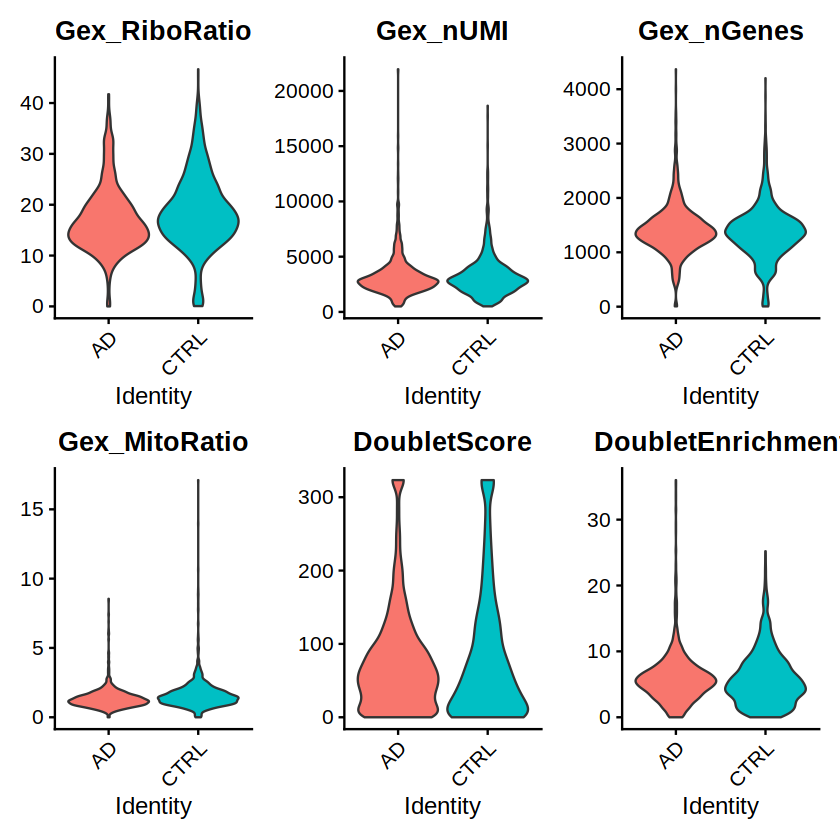

In [6]:
VlnPlotS(proj, features=c('Gex_RiboRatio', 'Gex_nUMI', 'Gex_nGenes', 'Gex_MitoRatio', "DoubletScore", "DoubletEnrichment"), group.by="Sample", pt.size=0)

In [7]:
proj <- proj[proj$DoubletEnrichment<15, ]
proj <- proj[proj$Gex_nGenes>400, ]


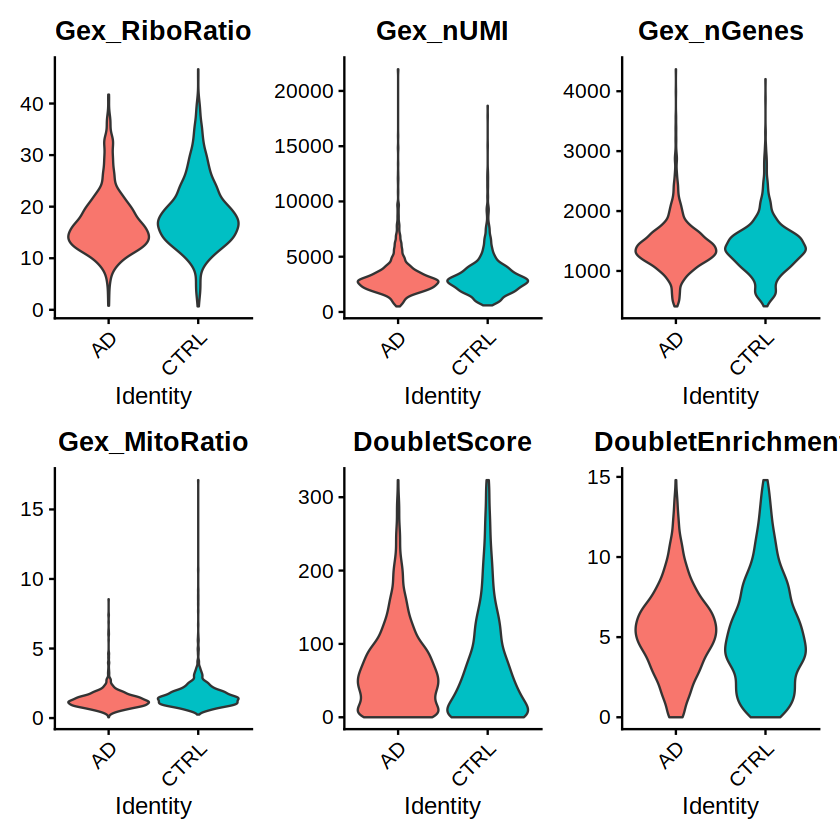

In [8]:
VlnPlotS(proj, features=c('Gex_RiboRatio', 'Gex_nUMI', 'Gex_nGenes', 'Gex_MitoRatio', "DoubletScore", "DoubletEnrichment"), group.by="Sample", pt.size=0)

In [9]:
proj <- suppressMessages(addRNAIterativeLSI(proj))

Warning message in if (grepl("log", units, ignore.case = TRUE)) {:
“the condition has length > 1 and only the first element will be used”
Warning message in if (units %in% "BinarizedCounts") {:
“the condition has length > 1 and only the first element will be used”


In [10]:
proj <- suppressMessages(addClusters(proj, reducedDims = "RNAIterativeLSI", biasCol = "Gex_nUMI"))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 3238
Number of edges: 115538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6785
Number of communities: 10
Elapsed time: 0 seconds


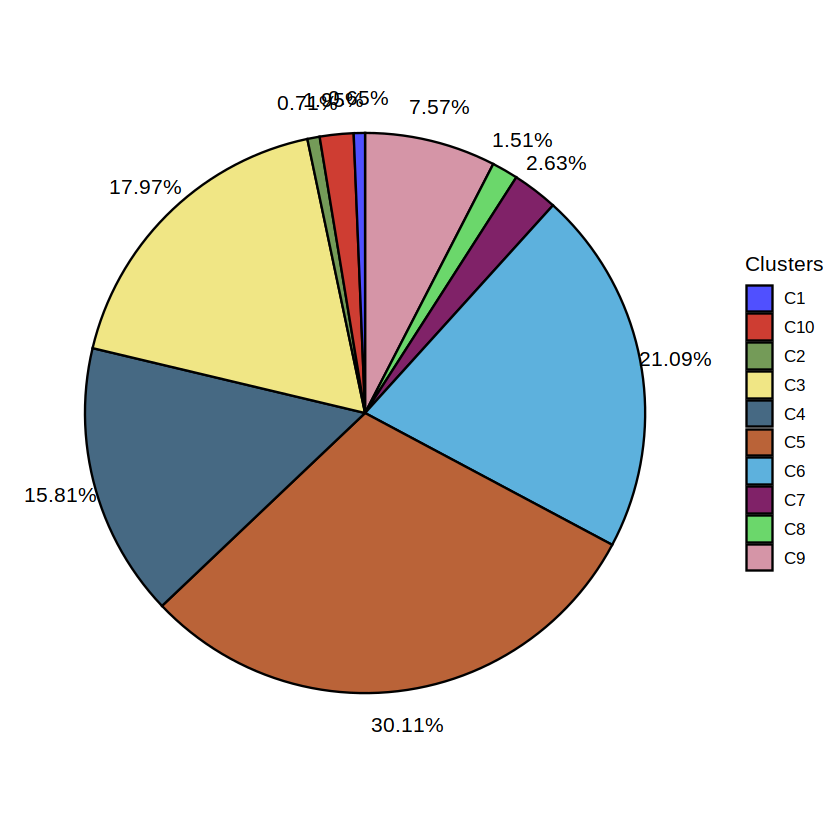

In [11]:
PiePlotS(proj, Cluster="Clusters")

In [12]:
proj <- suppressMessages(addUMAP(proj, reducedDims = "RNAIterativeLSI", verbose = F, force=T))

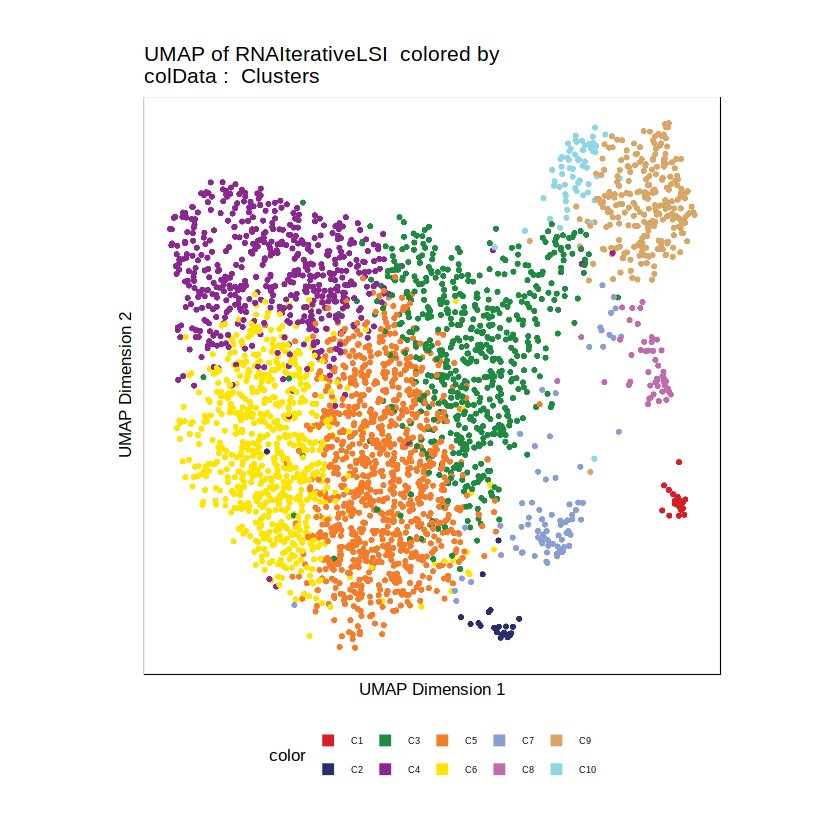

In [13]:
p1 <- suppressMessages(plotEmbedding(proj, name = "Clusters", embedding = "UMAP", size = 1.5, labelAsFactors=F, labelMeans=F))
p1 

Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“assay is NULL, use first assay counts!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“features is NULL, use all features!”
Warning message in FetchData.Seurat(object = object, vars = features, slot = slot):
“The following requested variables were not found: Azu1, Lyz, Hbb, Hbd”
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of Spink1.”
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of Mpo.”
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of Elane.”
Warning message in SingleExIPlot(type = type, data = data[, x, drop = FALSE], idents = idents, :
“All cells have the same value of Tubb1.”
Warning message in SingleExIPlot(type = type, da

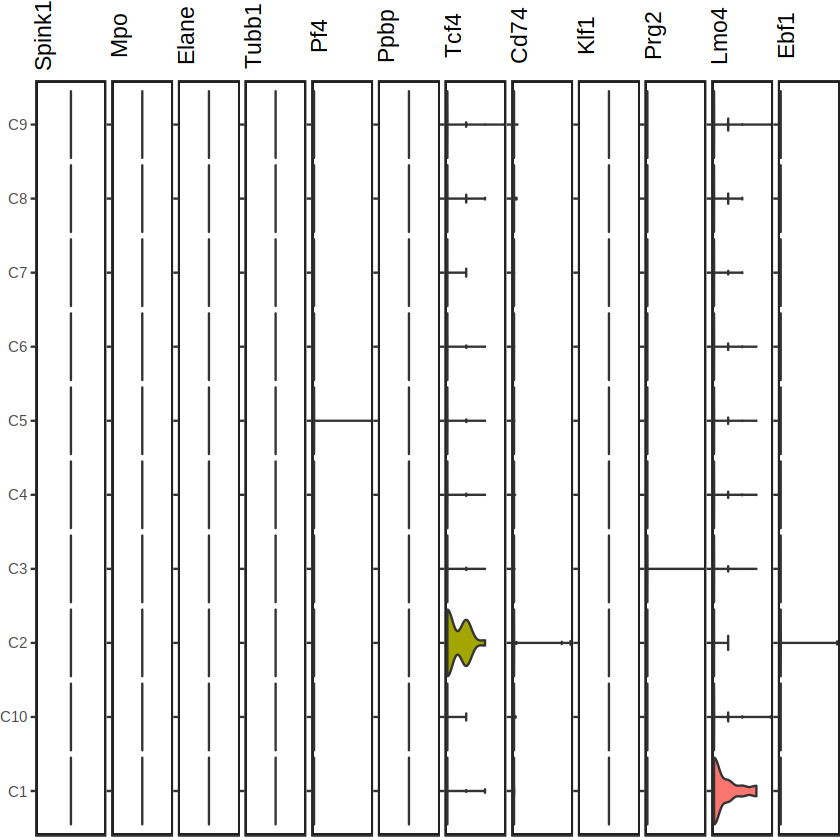

In [14]:
genes <- stringr::str_to_title(c("SPINK1", "AZU1", "MPO", "ELANE", "TUBB1", "PF4", "PPBP", "LYZ", "TCF4", "CD74", "HBB", "HBD", "KLF1", "PRG2", "LMO4", "EBF1"))
suppressMessages(VlnMatrixPlotS(proj, features = genes, Cluster="Clusters", leftmost_width = 1.6))

Warning message in DotPlotS(proj, features = genes, group.by = "Clusters"):
“useMatrix is NULL, use first matrix GeneExpressionMatrix!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“assay is NULL, use first assay counts!”
Warning message in PartialSeurat(project, useMatrix = useMatrix, assay = assay):
“features is NULL, use all features!”
Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: Azu1, Lyz, Hbb, Hbd”


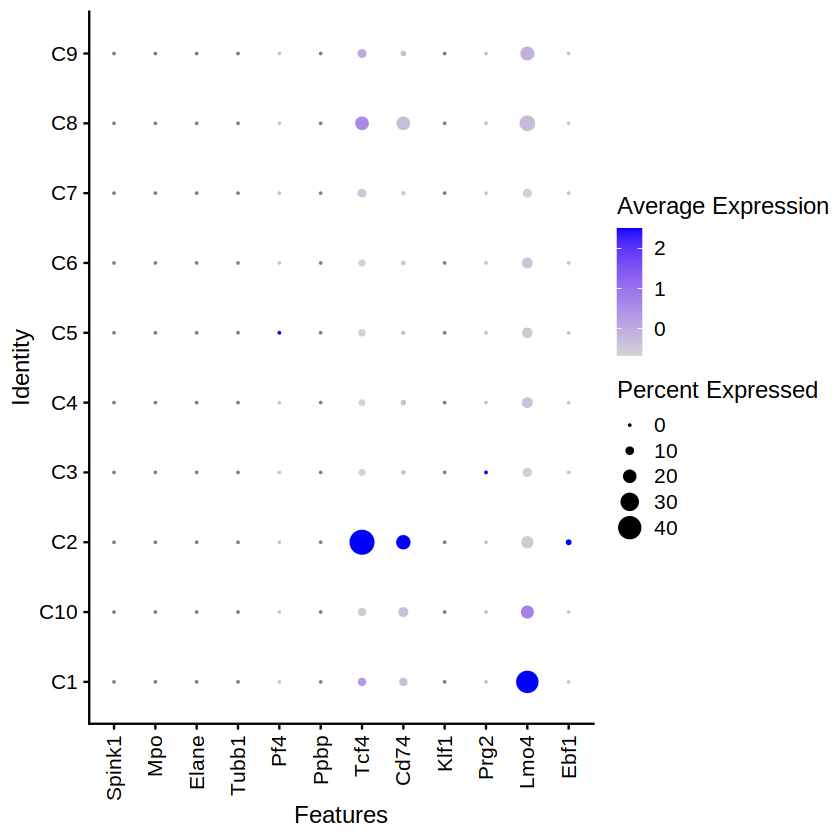

In [15]:
suppressMessages(DotPlotS(proj, features=genes, group.by="Clusters") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)))

In [16]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /data/sz753404/miniconda3/envs/schema/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.utf-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.utf-8        LC_COLLATE=en_US.utf-8    
 [5] LC_MONETARY=de_DE.UTF-8    LC_MESSAGES=en_US.utf-8   
 [7] LC_PAPER=de_DE.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=de_DE.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      parallel  stats4    stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] gridExtra_2.3                      nabor_0.5.0                       
 [3] SeuratObject_4.1.3                 Seurat_4.3.0                      
 [5] BSgenome.Mmusculus.UCSC.mm10_1.4.0 BSgenome_1.60.0                   
 [7] rtracklayer_1.52.1    